# Convolutional Neural Network Applied on Cucumber9 Dataset
---

Descriptions: (from cifar10 description):

Loaded in this way, each of the batch files contains a dictionary with the following elements:
data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:
label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

### Import

In [1]:
import tensorflow as tf
import numpy as np
import cPickle
import matplotlib.pyplot as plt
import pandas as pd
import time 

In [2]:
%matplotlib inline

### Import all files

In [3]:
with open('./inputs/data_batch_1') as f:
    batch1 = cPickle.load(f)
with open('./inputs/data_batch_2') as f:
    batch2 = cPickle.load(f)
with open('./inputs/data_batch_3') as f:
    batch3 = cPickle.load(f)
with open('./inputs/data_batch_4') as f:
    batch4 = cPickle.load(f)
with open('./inputs/data_batch_5') as f:
    batch5 = cPickle.load(f)
with open('./inputs/batches.meta') as f:
    meta = cPickle.load(f)

### Understanding the Data

In [4]:
#Returns the shape of the data key for the first batch
batch1['data'].shape

(1485, 1024)

In [5]:
#Reshapes the images to its normal form allowing us to view the image
test = batch1['data'][0].reshape(32,32)

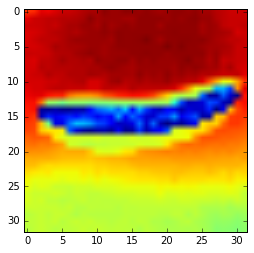

In [6]:
plt.imshow(test)

In [7]:
#Returns all the keys used for batch1
batch1.keys()

['batch_label', 'labels', 'data', 'filenames']

In [8]:
#Transforms the labels into their own dimensions
label_test = np.array(batch1['labels']).reshape(-1 ,1)
label_test.shape

(495, 1)

In [9]:
unique = pd.DataFrame(label_test)
unique.head()

,0
0,0
1,1
2,2
3,3
4,4


In [10]:
#We can see the distribution of the dataset using value_counts() on a dataframe
unique[0].value_counts()

8    66
1    63
3    59
0    58
4    57
2    53
7    48
5    46
6    45
Name: 0, dtype: int64

In [11]:
meta

{'label_names': ['2L', 'BM', 'BL', 'M', 'S', 'L', '2S', 'BS', 'C'],
 'num_cases_per_batch': 495,
 'num_vis': 3072}

### Creating the training and test labels

#### Convert the labels into one hot encoded

In [17]:
batch1['label_one_hot'] = [[1.0 if p==val else 0. for p in range(9)] for val in batch1['labels']]
batch2['label_one_hot'] = [[1.0 if p==val else 0. for p in range(9)] for val in batch2['labels']]
batch3['label_one_hot'] = [[1.0 if p==val else 0. for p in range(9)] for val in batch3['labels']]
batch4['label_one_hot'] = [[1.0 if p==val else 0. for p in range(9)] for val in batch4['labels']]
batch5['label_one_hot'] = [[1.0 if p==val else 0. for p in range(9)] for val in batch5['labels']]

In [18]:
#Checking the data if encoded to one hot properly
print(batch1['labels'][0])
print(batch1['label_one_hot'][0])

0
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Creating the training and test data

In [19]:
dataset = {
    'features': [],
    'labels': []
}

In [20]:
for i in batch1['data']:
    dataset['features'].append(i)
for i in batch2['data']:
    dataset['features'].append(i)
for i in batch3['data']:
    dataset['features'].append(i)
for i in batch4['data']:
    dataset['features'].append(i)
for i in batch5['data']:
    dataset['features'].append(i)

In [21]:
for i in batch1['label_one_hot']:
    dataset['labels'].append(i)
for i in batch2['label_one_hot']:
    dataset['labels'].append(i)
for i in batch3['label_one_hot']:
    dataset['labels'].append(i)
for i in batch4['label_one_hot']:
    dataset['labels'].append(i)
for i in batch5['label_one_hot']:
    dataset['labels'].append(i)

In [22]:
dataset['features'] = np.array(dataset['features'])
dataset['labels'] = np.array(dataset['labels'])

In [23]:
dataset['features'].shape

(7425, 1024)

In [24]:
dataset['labels'].shape

(2475, 9)

In [25]:
7425/3

2475

In [26]:
1425/3

475

In [27]:
6000/3

2000

In [28]:
dataset['features'].shape

(7425, 1024)

In [29]:
training_feature = dataset['features'][:6000]
training_label = dataset['labels'][:2000]
test_feature = dataset['features'][6000:]
test_label = dataset['labels'][2000:]

In [30]:
training_feature.shape

(6000, 1024)

In [31]:
test_feature.shape

(1425, 1024)

In [32]:
training_label.shape

(2000, 9)

In [33]:
test_label.shape

(475, 9)

In [34]:
training_feature[::3].shape

(2000, 1024)

In [35]:
test_feature[::3].shape

(475, 1024)

### Model

#### Perceptron Implementation

In [42]:
with tf.device('/cpu:0'):
    X1 = tf.placeholder(tf.float32, [None, 1024])
    Y1 = tf.placeholder(tf.float32, [None, 9])
    
    W1 = tf.Variable(tf.ones([1024, 9]))
    B1 = tf.Variable(tf.ones([9]))
    
    yS = tf.nn.softmax(tf.matmul(X1, W1) + B1)
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y1*tf.log(yS), reduction_indices = [1]))
    
    grad = tf.train.AdadeltaOptimizer(0.0005).minimize(cross_entropy)

In [43]:
sess = tf.InteractiveSession()

In [44]:
tf.global_variables_initializer().run()

In [45]:
epoch = 5000
start = time.time()
for i in range(epoch):
    if i%100==0:
        correct_predictions = tf.equal(tf.argmax(yS, 1), tf.argmax(Y1, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
        print(sess.run(accuracy, {X1:test_feature[::3], Y1:test_label}))
    sess.run(grad, {X1:training_feature[::3], Y1:training_label})
end = time.time()-start
print("Total Time: {} seconds".format(end))

0.0989474
0.324211
0.330526
0.372632
0.395789
0.406316
0.402105
0.429474
0.44
0.448421
0.450526
0.456842
0.484211
0.494737
0.492632
0.496842
0.503158
0.517895
0.517895
0.530526
0.536842
0.536842
0.534737
0.536842
0.534737
0.541053
0.557895
0.541053
0.549474
0.555789
0.557895
0.551579
0.555789
0.562105
0.562105
0.570526
0.570526
0.576842
0.572632
0.574737
0.574737
0.570526
0.568421
0.574737
0.578947
0.591579
0.576842
0.587368
0.574737
0.597895
Total Time: 189.361598969 seconds


### 3 Layer Feed Forward Neural Network

In [55]:
with tf.device('/cpu:0'):
    keep_prob = 0.6
    x1 = tf.placeholder(tf.float32, [None, 1024])
    y1 = tf.placeholder(tf.float32, [None, 9])
    
    w1 = tf.Variable(tf.ones([1024, 1024]), tf.float32)
    b1 = tf.Variable(tf.ones([1024]), tf.float32)
    
    
    w2 = tf.Variable(tf.zeros([1024, 1024]), tf.float32)
    b2 = tf.Variable(tf.ones([1024]), tf.float32)
    
    w3 = tf.Variable(tf.zeros([1024, 9]), tf.float32)
    b3 = tf.Variable(tf.ones([9]), tf.float32)
    
    logit_1 = tf.nn.relu(tf.matmul(x1, w1) + b1)
    drop1 = tf.nn.dropout(logit_1, keep_prob=keep_prob)
    logit_2 = tf.nn.relu(tf.matmul(drop1, w2) + b2)
    drop2 = tf.nn.dropout(logit_2, keep_prob=keep_prob)
    logit_3 = tf.nn.softmax(tf.matmul(drop2, w3) + b3)
    
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y1*tf.log(logit_3), reduction_indices=[1]))
    train = tf.train.AdadeltaOptimizer(0.005).minimize(cross_entropy)

In [56]:
sess = tf.InteractiveSession()

In [57]:
tf.global_variables_initializer().run()

In [58]:
epoch = 500
start = time.time()
for i in range(epoch):
    if i%100==0:
        correct_prediction = tf.equal(tf.argmax(logit_3, 1), tf.argmax(y1, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print(sess.run(accuracy, feed_dict={x1:test_feature[::3], y1:test_label}))
    sess.run(train, feed_dict={x1:training_feature[::3], y1:training_label})
end = time.time() - start
print("Total Time: {}".format(end))

0.0989474
0.107368
0.111579
0.109474
0.128421
Total Time: 675.641777039


### Convolutional Neural Network

In [45]:

training_conv = training_feature.reshape(2000,32,32,3)
testing_conv = test_feature.reshape(475,32,32,3)

In [46]:
32*32*8

8192

In [12]:
with tf.device("/cpu:0"):
    x1 = tf.placeholder(tf.float32, [None, 32, 32, 3])
    yfinal = tf.placeholder(tf.float32, [None, 9])
    
    w_conv1 = tf.Variable(tf.truncated_normal([8, 8, 3, 4]), tf.float32)
    b_conv1 = tf.Variable(tf.ones([4]), tf.float32)
    
    w_conv2 = tf.Variable(tf.truncated_normal([4, 4, 4, 8]), tf.float32)
    b_conv2 = tf.Variable(tf.ones([8]))
    
    w1 = tf.Variable(tf.truncated_normal([8192, 9]), tf.float32)
    b1 = tf.Variable(tf.ones([9]), tf.float32)
    
    conv1 = tf.nn.relu(tf.nn.conv2d(x1, w_conv1, strides=[1, 1, 1, 1], padding="SAME")+b_conv1)
    conv2 = tf.nn.relu(tf.nn.conv2d(conv1, w_conv2, strides=[1, 1, 1, 1], padding="SAME")+b_conv2)
    
    converted = tf.reshape(conv2, [-1, 32*32*8])
    
    fc = tf.matmul(converted, w1)+b1
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=yfinal, logits=fc)
    train = tf.train.AdadeltaOptimizer(0.05).minimize(cross_entropy)

In [14]:
sess = tf.InteractiveSession()

In [15]:
tf.global_variables_initializer().run()

In [ ]:
epoch = 100
for i in range(epoch):
    if i%100==0:
        correct_prediction = tf.equal(tf.argmax(yfinal, 1), tf.argmax(fc, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print(sess.run(accuracy, {x1: , yfinal: ,})
    sess.run(train, {x1: ,yfinal: })